# Parkinson's Disease Detection Project
### Tom Ritman-Meer using Google Colaboratory
In this notebook I investigate a labelled data set with 22 patient feature variables and a single column indicating the status of the Parkinson's Disease diagnosis, 1 indicating the presence of the disease and 0 its absence. Using a range of machine learning models I demonstrate that the presence of Parkinson's Disease can be predicted extremely accurately using the feature variables, suggesting that machine learning could be a valuable diagnostic tool to aid clinicians in their diagnosis of this disease.

### Retrieve data set from kaggle.com

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d debasisdotcom/parkinson-disease-detection

In [8]:
! unzip parkinson-disease-detection.zip

Archive:  parkinson-disease-detection.zip
  inflating: Parkinsson disease.csv  


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
data = pd.read_csv("Parkinsson disease.csv")  

In [11]:
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


### Preliminary Data Analysis

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [41]:
data = data.drop("name", axis = 1)

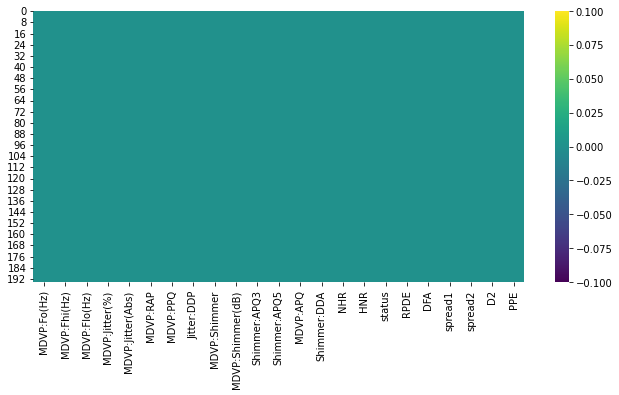

In [42]:
plt.figure(figsize=(11,5))
sns.heatmap(data.isnull(),cmap='viridis')

In [43]:
data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [44]:
data["status"].value_counts()

1    147
0     48
Name: status, dtype: int64

Data set is fairly well balanced, with 147 positive cases and 48 negative cases.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbde1d23850>,
      dtype=object)

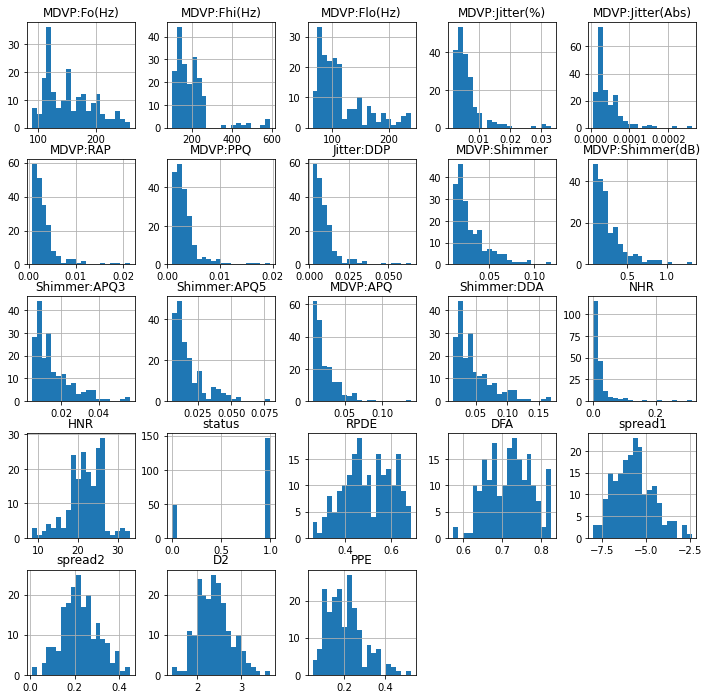

In [45]:
data.hist(bins=20, figsize=(12,12))

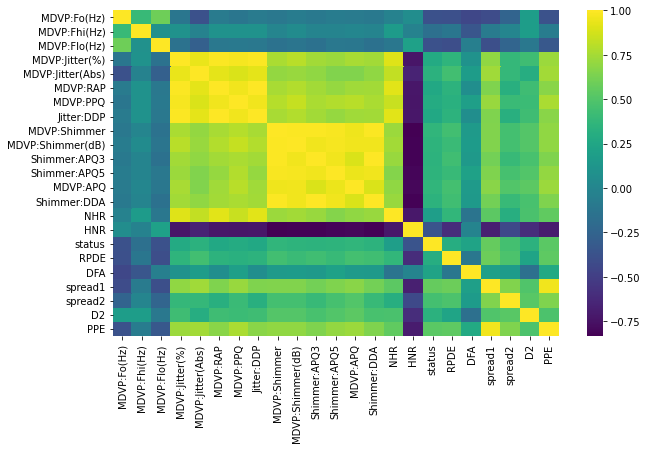

In [46]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),cmap="viridis")

In [47]:
#Let's see which variables are most strongly correlated with the status
data.corr()['status'].sort_values(ascending=False)

status              1.000000
spread1             0.564838
PPE                 0.531039
spread2             0.454842
MDVP:Shimmer        0.367430
MDVP:APQ            0.364316
Shimmer:APQ5        0.351148
MDVP:Shimmer(dB)    0.350697
Shimmer:APQ3        0.347617
Shimmer:DDA         0.347608
D2                  0.340232
MDVP:Jitter(Abs)    0.338653
RPDE                0.308567
MDVP:PPQ            0.288698
MDVP:Jitter(%)      0.278220
MDVP:RAP            0.266668
Jitter:DDP          0.266646
DFA                 0.231739
NHR                 0.189429
MDVP:Fhi(Hz)       -0.166136
HNR                -0.361515
MDVP:Flo(Hz)       -0.380200
MDVP:Fo(Hz)        -0.383535
Name: status, dtype: float64

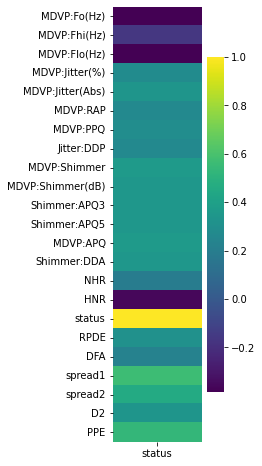

In [48]:
plt.figure(figsize=(2,8))
sns.heatmap(data.corr()[['status']],cmap="viridis")

### Data Cleaning and Scaling

We will now split the data into training and test sets, for training and evaluating individual model performance.

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop('status',axis=1), data['status'], test_size=0.30, random_state=42)

In [56]:
from sklearn.preprocessing import MinMaxScaler

In [57]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Application of Machine Learning Models for Diagnostic Prediction

Firstly we will try a simple logistic regression model.

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
log_reg_pred = log_reg.predict(X_test)

In [62]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,log_reg_pred))
print(confusion_matrix(y_test,log_reg_pred))

              precision    recall  f1-score   support

           0       0.90      0.60      0.72        15
           1       0.88      0.98      0.92        44

    accuracy                           0.88        59
   macro avg       0.89      0.79      0.82        59
weighted avg       0.88      0.88      0.87        59

[[ 9  6]
 [ 1 43]]


This is a good start. The predictive accuracy is 88% and there is only one false negative. Next we can try a Naive Bayes classifier model.

In [63]:
from sklearn.naive_bayes import GaussianNB

In [64]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
gnb_pred = gnb.predict(X_test)

In [65]:
print(classification_report(y_test,gnb_pred))
print(confusion_matrix(y_test,gnb_pred))

              precision    recall  f1-score   support

           0       0.52      0.80      0.63        15
           1       0.92      0.75      0.83        44

    accuracy                           0.76        59
   macro avg       0.72      0.78      0.73        59
weighted avg       0.82      0.76      0.78        59

[[12  3]
 [11 33]]


This model is clearly inferior to the logistic model, with many false negatives. Since false negatives are to be avoided in disease detection we will move on to some decision tree ensemble methods.

Let's try a random forest classifier model. I will use the GridSearchCV tool from Scikit Learn to optimise the parameters, in order to give the optimal model performance.

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [91]:
rfc = RandomForestClassifier()


In [92]:
param_grid = { 
    'n_estimators': [100, 300, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [94]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 300, 500]})

In [95]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 100}

In [105]:
rfc1=RandomForestClassifier(max_features='sqrt', n_estimators= 100, max_depth=8, criterion='gini')

In [106]:
rfc1.fit(X_train,y_train)
rfc1_pred = rfc1.predict(X_test)

In [107]:
print(classification_report(y_test,rfc1_pred))
print(confusion_matrix(y_test,rfc1_pred))

              precision    recall  f1-score   support

           0       1.00      0.73      0.85        15
           1       0.92      1.00      0.96        44

    accuracy                           0.93        59
   macro avg       0.96      0.87      0.90        59
weighted avg       0.94      0.93      0.93        59

[[11  4]
 [ 0 44]]


The random forest classifier gives an excellent performance with 93% accuracy. There are only 4 false positives in the diagnosis predictions and no false negatives, which are so important to avoid in disease detection.

Now we will try an xgboost classifier, to determine whether this can outperform the random forest classifier.

In [80]:
from xgboost import XGBClassifier

In [109]:
xgb = XGBClassifier()

In [108]:
param_grid = {"subsample":[0.5, 0.75, 1],
              "colsample_bytree":[0.5, 0.75, 1],
              "max_depth":[2, 6, 12],
              "min_child_weight":[1,5,15],
              "learning_rate":[0.3, 0.1, 0.03],
              "n_estimators":[100]}

In [110]:
CV_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid, cv= 5)
CV_xgb.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=XGBClassifier(),
             param_grid={'colsample_bytree': [0.5, 0.75, 1],
                         'learning_rate': [0.3, 0.1, 0.03],
                         'max_depth': [2, 6, 12],
                         'min_child_weight': [1, 5, 15], 'n_estimators': [100],
                         'subsample': [0.5, 0.75, 1]})

In [111]:
CV_xgb.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 6,
 'min_child_weight': 1,
 'n_estimators': 100,
 'subsample': 1}

In [112]:
xgb1 = XGBClassifier(colsample_bytree=0.5, learning_rate = 0.1, max_depth = 6, min_child_weight = 1, n_estimators = 100, subsample = 1)

In [113]:
xgb1.fit(X_train, y_train)
xgb1_pred = xgb1.predict(X_test)

In [114]:
print(classification_report(y_test,xgb_pred))
print(confusion_matrix(y_test,xgb_pred))

              precision    recall  f1-score   support

           0       1.00      0.73      0.85        15
           1       0.92      1.00      0.96        44

    accuracy                           0.93        59
   macro avg       0.96      0.87      0.90        59
weighted avg       0.94      0.93      0.93        59

[[11  4]
 [ 0 44]]


The xgboost classifier model performs identically to the random forest model, with 93% accuracy, zero false negatives and only 4 false positive diagnoses.

We will now try a support vector machines classifier model.

In [116]:
from sklearn.svm import SVC

In [117]:
svc = SVC()
svc.fit(X_train,y_train)
svc_pred = svc.predict(X_test)

In [118]:
print(classification_report(y_test,svc_pred))
print(confusion_matrix(y_test,svc_pred))

              precision    recall  f1-score   support

           0       1.00      0.53      0.70        15
           1       0.86      1.00      0.93        44

    accuracy                           0.88        59
   macro avg       0.93      0.77      0.81        59
weighted avg       0.90      0.88      0.87        59

[[ 8  7]
 [ 0 44]]


The SVC classifier model performs well, with zero false negatives but there are a few more false positives than seen with the decision tree ensemble models.

Finally, let's try a neural network using Keras, to see if this model can outperform the tree ensemble models. It is unlikely this will be the case, due to the small size of the data set but it is worth a look.

In [135]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [136]:
X_train.shape
#22 input variables, so we require 22 inputs to the neural network

(136, 22)

I will try an artificial neural network model with 22 input variables, hidden layers with ReLU activation function, each with 12, 6 and 3 neurons respectively and a single output neuron witih a sigmoid activation function for binary classification. 

In [162]:
model = Sequential()
#define number of model layers and number of neurons in each layer
model.add(Dense(units=22,activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(units=12,activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(units=6,activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(units=3,activation='relu'))
#model.add(Dropout(0.2))
# This is a binary classification problem, so we require a sigmoid activation function
model.add(Dense(units=1,activation='sigmoid'))
# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [163]:
model.fit(x=X_train, y=y_train, epochs=150, validation_data=(X_test, y_test))

Epoch 1/150
5/5 [==============================] - 1s 41ms/step - loss: 0.6708 - val_loss: 0.6651
Epoch 2/150
5/5 [==============================] - 0s 8ms/step - loss: 0.6516 - val_loss: 0.6487
Epoch 3/150
5/5 [==============================] - 0s 8ms/step - loss: 0.6333 - val_loss: 0.6297
Epoch 4/150
5/5 [==============================] - 0s 8ms/step - loss: 0.6118 - val_loss: 0.6102
Epoch 5/150
5/5 [==============================] - 0s 8ms/step - loss: 0.5890 - val_loss: 0.5895
Epoch 6/150
5/5 [==============================] - 0s 8ms/step - loss: 0.5676 - val_loss: 0.5657
Epoch 7/150
5/5 [==============================] - 0s 12ms/step - loss: 0.5440 - val_loss: 0.5412
Epoch 8/150
5/5 [==============================] - 0s 12ms/step - loss: 0.5181 - val_loss: 0.5173
Epoch 9/150
5/5 [==============================] - 0s 10ms/step - loss: 0.4993 - val_loss: 0.4998
Epoch 10/150
5/5 [==============================] - 0s 8ms/step - loss: 0.4830 - val_loss: 0.4881
Epoch 11/150
5/5 [=======

In [164]:
from tensorflow.keras.models import load_model
model.save('parkinsons_ANN_model.h5')

In [165]:
model_loss = pd.DataFrame(model.history.history)
model_loss.tail()

,loss,val_loss
145,0.200023,0.295098
146,0.199718,0.296909
147,0.197791,0.283538
148,0.196765,0.284339
149,0.195317,0.286935


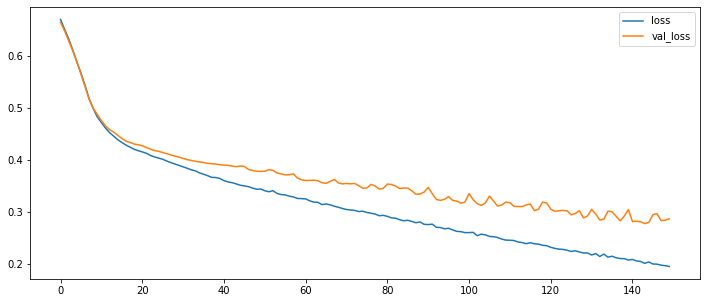

In [166]:
model_loss.plot(figsize=(12,5))

In [173]:
ANN_pred = (model.predict(X_test) >= 0.5).astype("int32")

2/2 [==============================] - 0s 6ms/step


In [174]:
print(classification_report(y_test,ANN_pred))
print(confusion_matrix(y_test,ANN_pred))

              precision    recall  f1-score   support

           0       0.91      0.67      0.77        15
           1       0.90      0.98      0.93        44

    accuracy                           0.90        59
   macro avg       0.90      0.82      0.85        59
weighted avg       0.90      0.90      0.89        59

[[10  5]
 [ 1 43]]


The artificial neural network performs very well on this data set, giving a 90% accuracy on the diagnostic predictions. There is only 1 false negative 

In [226]:
X=data.drop('status',axis=1)
y=data['status']
rand_generator = np.random.randint(0,len(X)-1)
new_pred = scaler.transform(X.iloc[[rand_generator]]) #using double brackets for the iloc[[x]] returns a pandas DataFrame and not a Series.
actual = y[rand_generator] 
print('Compare Random Prediction with Actual Value\nPrediction:', rfc1.predict(new_pred)[0],'\nActual:    ',actual)

Compare Random Prediction with Actual Value
Prediction: 1 
Actual:     1


### Conclusion
In this project we have considered a number of machine learning models applied to the detection of Parkinson's Disease using a data set with 22 feature variables. The best models for the application were tree ensemble methods, including random forest classifier and xgboost classifier models. Both of these models gave a predictive accuracy of 93% and resulted in zero false negative predictions. It is very important to avoid false negatives in models for disease diagnosis, since it is far better to conduct an unnecessary screening than to falsely diagnose the patient as healthy when they actually have the disease. The current study shows the power of machine learning as a diagnostic tool to aid clinicians in their diagnosis of Parkinson's Disease.